QUESTION 1


(a) Rotations, translations and scaling are all rigid transformations which are affine transformations, meaning these transformations preserve points, straight lines and parallelism

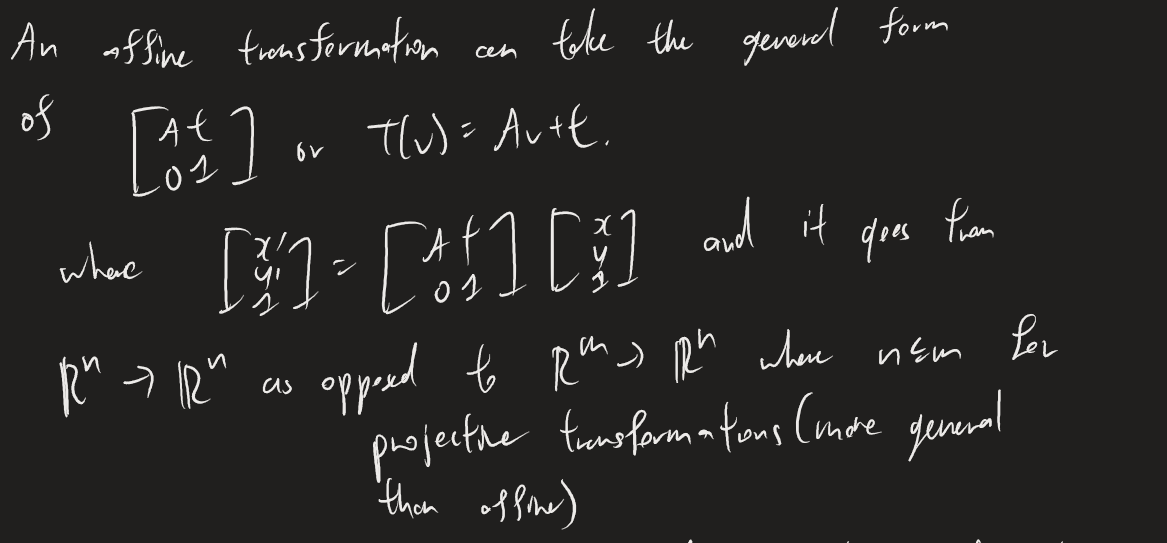
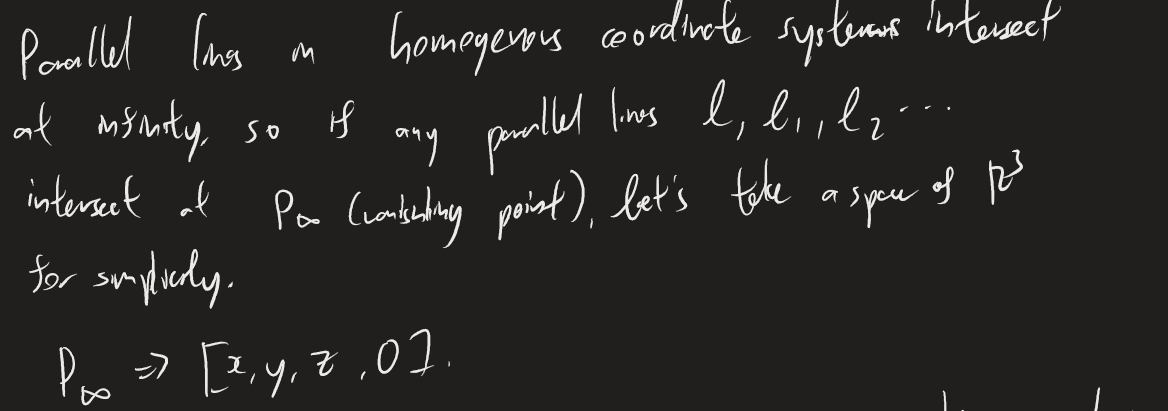
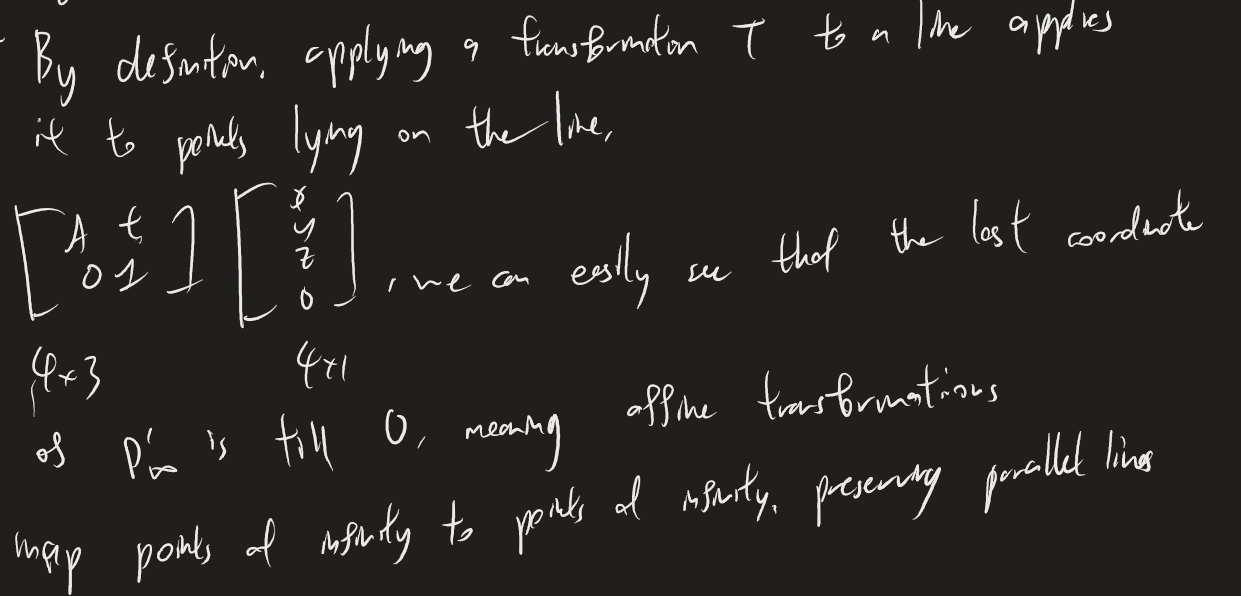

(b) Rotations and translations are isometric transformations so they preserve distances and angles so unit area would be the same

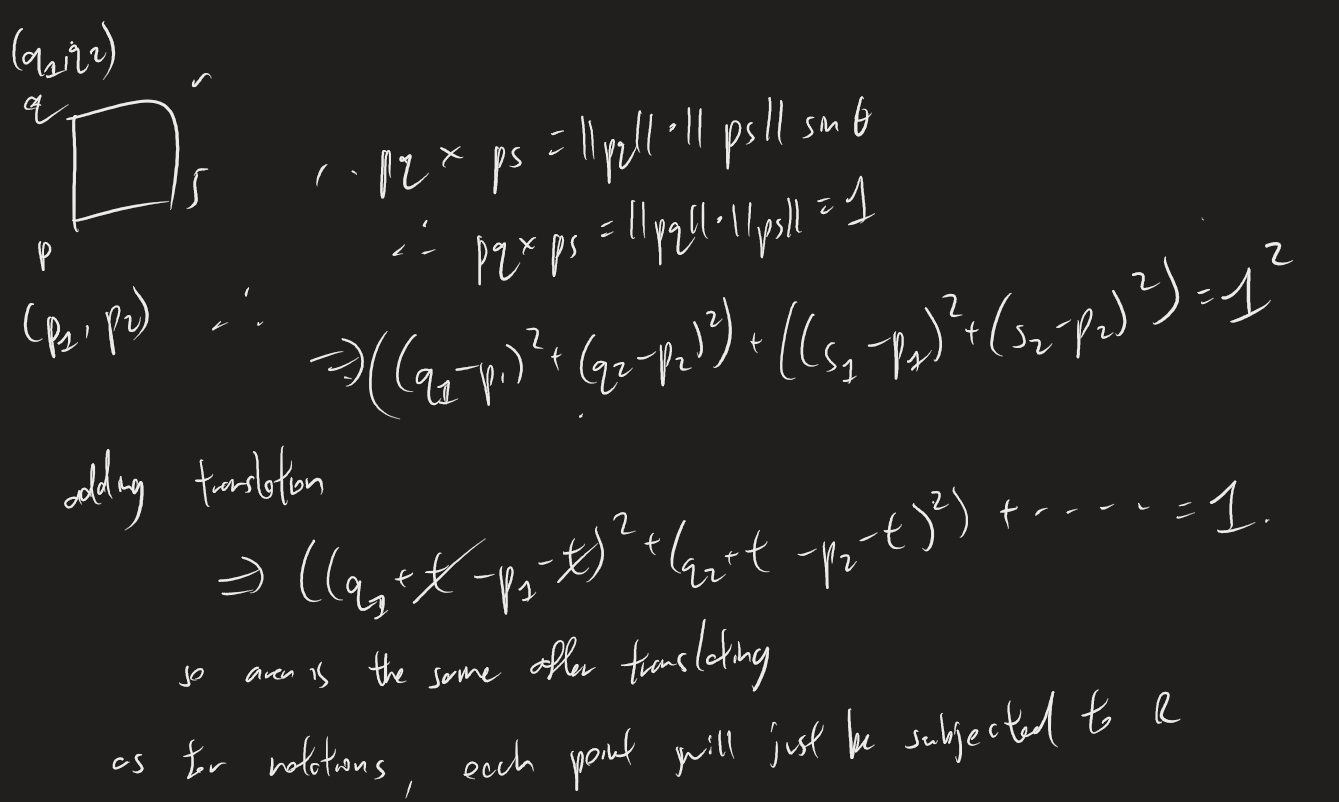
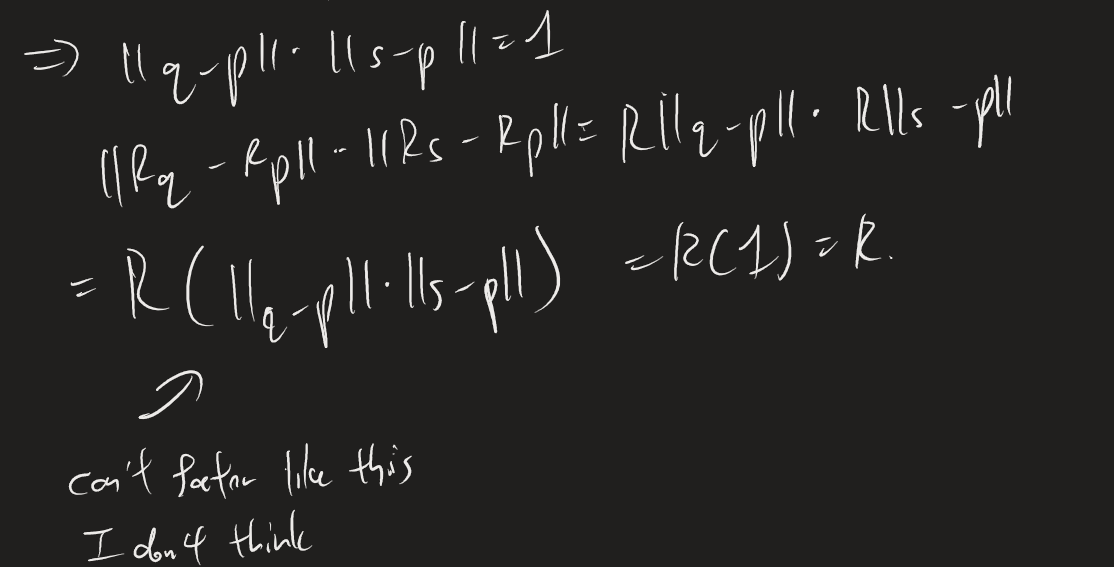

(c) NO FUCKING CLUE

(d) Projective transformations might map a point at infinity to a point not at infinity, so it does not preserve parallelism (as two parallel lines meeting at infinity after being projectively might not meet at infinity anymore, hence no longer parallel)

In [106]:
import numpy as np

In [107]:
def compute_camera_matrix(real_XY, front_image, back_image):
    # TODO: Fill in this code
    # Hint: reshape your values such that you have PM=p,
    # and use np.linalg.lstsq or np.linalg.pinv to solve for M.
    # See https://apimirror.com/numpy~1.11/generated/numpy.linalg.pinv
    #
    # Our solution has shapes for M=(8,), P=(48,8), and p=(48,)
    # Alternatively, you can set things up such that M=(4,2), P=(24,4), and p=(24,2)
    # Lastly, reshape and add the (0,0,0,1) row to M to have it be (3,4)

    # BEGIN YOUR CODE HERE
    pass
    # END YOUR CODE HERE

In [108]:
real_XY = np.load('real_XY.npy')
front_image = np.load('front_image.npy')
back_image = np.load('back_image.npy')

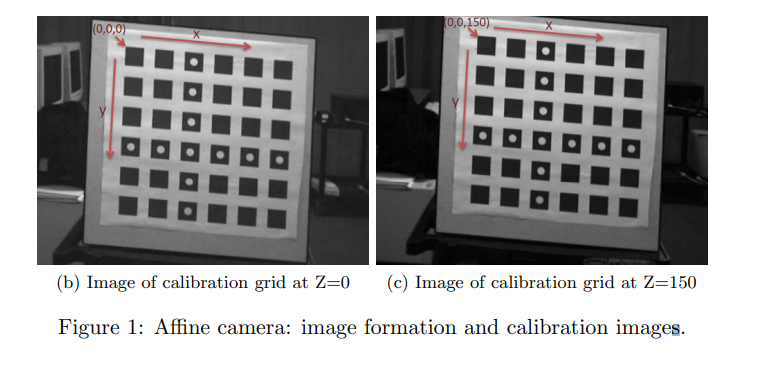 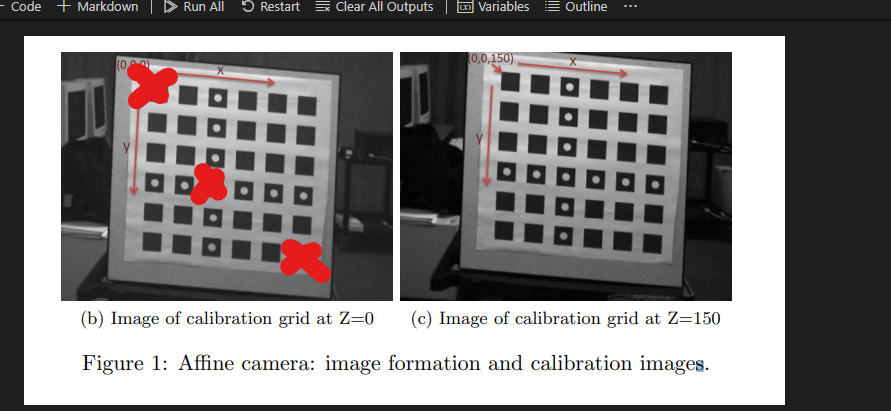

In [109]:
import numpy as np
from utils import mat2euler
import math

In [110]:
#the real world co-ordinates are given in real_XY, so converting them depending on their Z axis we have our original P, now the co-ordinates given in front and back image
#(in floats) represent 2d co-ordinates UV, so we essentially have MP(front) = p(front) and MP(back) = p(back)

real_front_3d = np.concatenate((real_XY, np.zeros((12, 1))), axis = 1)
real_front_3d = np.reshape(real_front_3d, (12, 3))



real_back_3d = np.concatenate((real_XY, np.ones((12, 1))), axis = 1)
for i in range(len(real_back_3d)):
    real_back_3d[i, 2] *= 150

real_back_3d = np.reshape(real_back_3d, (12, 3))

#correspondences are between front, back and real grids 

In [111]:
#converting co-ordinates to homogenous systems 
#co-ordinats are already sorted in order for corresponding points

real_front_3d = np.concatenate((real_front_3d, np.ones((12, 1))), axis = 1)
real_back_3d = np.concatenate((real_back_3d, np.ones((12, 1))), axis = 1)
front_image = np.concatenate((front_image, np.ones((12,1))), axis=1)
back_image = np.concatenate((back_image, np.ones((12,1))), axis=1)

In [112]:
print(real_front_3d.shape)
print(real_back_3d.shape)
print(front_image.shape)
print(back_image.shape)

(12, 4)
(12, 4)
(12, 3)
(12, 3)


In [113]:
#putting both front and back as a total system of linear equations
total_real_3d = np.concatenate((real_front_3d, real_back_3d), axis=0)
total_image = np.concatenate((front_image, back_image), axis=0)


In [114]:
M, res, rank, s = np.linalg.lstsq(total_real_3d, total_image)
final_M = np.transpose(M)
print(final_M.shape)
print(final_M)

(3, 4)
[[ 5.31276507e-01 -1.80886074e-02  1.20509667e-01  1.29720641e+02]
 [ 4.84975447e-02  5.36366401e-01 -1.02675222e-01  4.43879607e+01]
 [-2.58318699e-18  5.20417043e-18  4.17417836e-18  1.00000000e+00]]


C:\Users\pavan\AppData\Local\Temp\ipykernel_16820\2942782199.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  M, res, rank, s = np.linalg.lstsq(total_real_3d, total_image)


In [115]:
print(total_image.shape)
print(total_real_3d.shape)

(24, 3)
(24, 4)


In [116]:
calculated_corner_locations_from_M = np.matmul(final_M, np.transpose(total_real_3d))
calculated_corner_locations_from_M = np.transpose(calculated_corner_locations_from_M)
print(calculated_corner_locations_from_M - total_image)

[[-4.86359222e-01  9.17607415e-02  0.00000000e+00]
 [-6.26338729e-02  2.23637976e-01 -1.11022302e-16]
 [ 4.08735759e-01  9.01858039e-01  2.22044605e-16]
 [-4.73589590e-01 -1.47219196e-01  2.22044605e-16]
 [-7.81838729e-02 -1.45889581e+00  8.88178420e-16]
 [ 8.04141476e-01 -8.68418572e-01  6.66133815e-16]
 [ 3.58311108e-01  2.68401490e-01  8.88178420e-16]
 [ 3.93185759e-01  5.95124255e-01  1.11022302e-15]
 [-6.63399376e-01 -1.22376088e+00  1.11022302e-15]
 [ 1.13602597e+00 -6.33283645e-01  8.88178420e-16]
 [-2.27004396e-01  1.42063642e+00  1.11022302e-15]
 [-1.10922974e+00  8.30159182e-01  1.33226763e-15]
 [-7.53909222e-01 -6.34322592e-01  6.66133815e-16]
 [ 1.28416127e-01 -4.38453569e-02  4.44089210e-16]
 [ 1.41185759e-01  1.09297471e+00  6.66133815e-16]
 [-2.82539590e-01  5.02497471e-01  8.88178420e-16]
 [-3.45633873e-01 -1.26777914e+00  1.55431223e-15]
 [ 1.45379148e+00 -2.18701906e-01  1.33226763e-15]
 [ 5.49361108e-01  4.59418157e-01  1.55431223e-15]
 [ 1.25735759e-01 -1.31059078e-

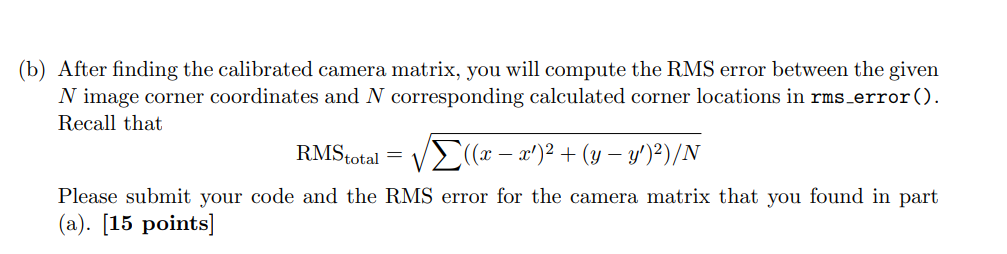

In [117]:
#N is 24

def RMS_total(matrix_one, matrix_two):
    error = 0
    for i in range(len(matrix_one)):
        error += ((matrix_one[i, 0] - matrix_two[i, 0]) ** 2) + ((matrix_one[i, 1] - matrix_two[i, 1]) ** 2)    
    error = error / 24
    error = np.sqrt(error)
    return error

print(RMS_total(calculated_corner_locations_from_M, total_image))

0.9938304832798428


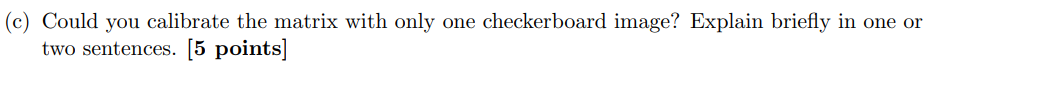

With only one checkerboard image, we would have 12 corner observations still, meaning 24 total equations (as opposed to the 48 with two checkerboards). So there are in total 24 constraints to solve 8 unknowns, which is possible. Hence, the matrix can be calibrated. (even in the case of 11 unknowns, if we have 2n > 11, it is overdetermined, meaning we only need at least 6 correspondences and we have 12 in this case)

In [118]:
#i can find the intersection but the cross product of both lines i get DOES not end up with the for [x y 0] so how can they be considered to cross at "infinity"
#the reason for that is because projective transformation from 3d world to 2d image will map points at infinity to points no longer at infinity in the 2d image plane
#hence the 1 coordinate in my calculations before, by definition, vanishing points ARE these points at infinity which are mapped to points no longer at infinity at image plane 

In [119]:
def compute_vanishing_point(list):
    x_1 = list[0][0]
    y_1 = list[0][1] #point 1
    x_2 = list[1][0]
    y_2 = list[1][1] #point 2
    x_3 = list[2][0]
    y_3 = list[2][1] #point 3
    x_4 = list[3][0]
    y_4 = list[3][1] # point 4

    m_1 = (y_2 - y_1) / (x_2 - x_1)
    m_2 = (y_4 - y_3) / (x_4 - x_3)

    c_1 = (-m_1 * (x_1) + y_1)
    c_2 = (-m_2 * (x_3) + y_3)

    x = (c_2 - c_1) / (m_1 - m_2)
    y = m_1 * ((c_2 - c_1) / (m_1 - m_2)) + c_1

    #vanishing point is (x,y) in 2d image plane
    vanishing_point = np.array([x, y])

    return(vanishing_point)


In [120]:
print(compute_vanishing_point([[1474, 494], [714, 614], [1438, 1094], [750, 1378]]))

[3769.60144058  131.53661465]


In [121]:
vanishing_point_list = []

vanishing_point_list.append(compute_vanishing_point([[1840, 478], [1080, 598], [1774, 1086], [1094, 1340]]))  
vanishing_point_list.append(compute_vanishing_point([[1080, 598], [424, 356], [1094, 1340], [504, 900]]))  
vanishing_point_list.append(compute_vanishing_point([[674, 1826], [2456, 1060], [1774, 1086], [1094, 1340]]))  

print(vanishing_point_list) #have our three vanishing points needed to compute K as we have the assumption that camera is zero skew and distortion

[array([4545.25628141,   50.85427136]), array([-861.19511861, -118.11161388]), array([6517.22217664, -685.73298951])]


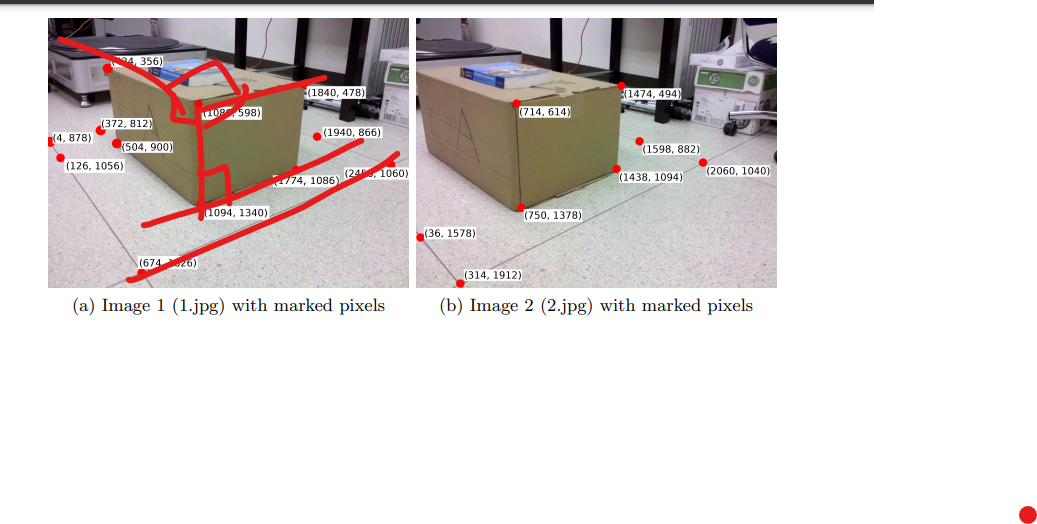
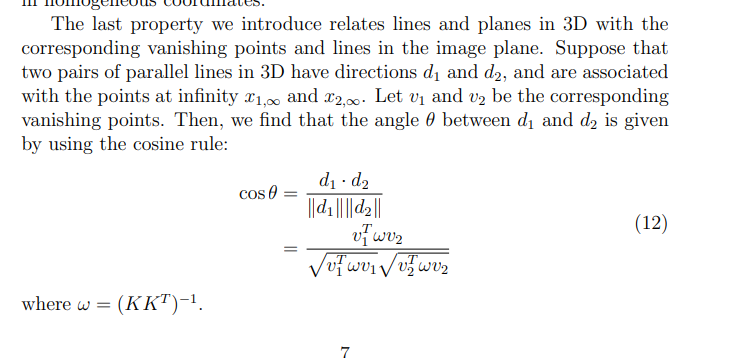

The three sets of parallel lines are orthogonal to each other (need to ask qilin how the third set is orthogonal as I really dont see it geometrically) so we have three constraints via definition of cosine rule. I suppose I'll have to double check the idea that if a line L and L2 lies on P and P2 planes respectively, if P and P2 are orthogonal, is it guaranteed that L and L2 are also orthogonal.


(c) It is not always possible to compute K from any set of vanishing points, they need to satisfy the constraint that they are "orthogonal" to each other to provide enough constraints to solve for K. However, this intrinsic camera matrix K is assumed to be square pixelated and isn't skewed, for K with these properties, we would need more vanishing points to compute K, but as for how, I'm unsure since I can't geometrically think of a way to find more than 3 mutually orthogonal planes in a 3d space. 

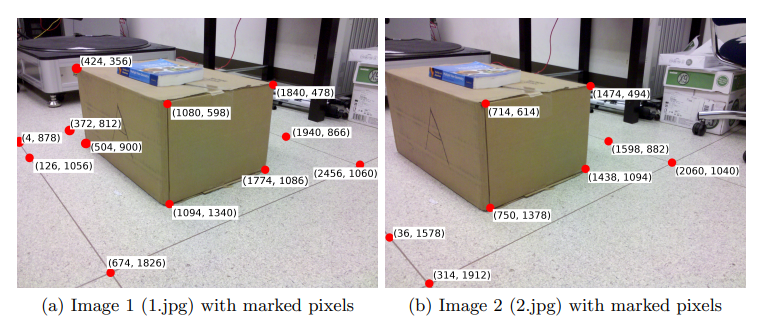

In [122]:
#camera matrix K given

K = np.array([2448, 0, 1253, 0, 2438, 986, 0, 0, 1])
K = np.reshape(K, (3,3))
print(K)

[[2448    0 1253]
 [   0 2438  986]
 [   0    0    1]]


In [123]:
#computing vanishing points to find vanishing lines (line of horizon), need two vanishing points to find a vanishing line

#parallel lines on the A plane
vanishingPoint_A1 = (compute_vanishing_point([[424, 356], [1080, 598], [504, 900], [1094, 1340]]))  
vanishingPoint_A2 = (compute_vanishing_point([[424, 356], [504, 900], [1080, 598], [1094, 1340]]))  

#parallel lines on ground plane
vanishingPoint_P1 = (compute_vanishing_point([[126, 1056], [674, 1826], [504, 900], [1094, 1340]]))  
vanishingPoint_P2 = (compute_vanishing_point([[1094, 1340], [1774, 1086], [674, 1826], [2456, 1060]]))  

#homogenous coords
vanishingPoint_A1 = np.reshape(vanishingPoint_A1, (2,1))
vanishingPoint_A2 = np.reshape(vanishingPoint_A2, (2,1))
vanishingPoint_P1 = np.reshape(vanishingPoint_P1, (2,1))
vanishingPoint_P2 = np.reshape(vanishingPoint_P2, (2,1))

vanishingPoint_A1 = np.concatenate((vanishingPoint_A1, np.ones((1,1))), axis=0)
vanishingPoint_A2 = np.concatenate((vanishingPoint_A2, np.ones((1,1))), axis=0)
vanishingPoint_P1 = np.concatenate((vanishingPoint_P1, np.ones((1,1))), axis=0)
vanishingPoint_P2 = np.concatenate((vanishingPoint_P2, np.ones((1,1))), axis=0)


#compute line of horizon via vanishing points
def compute_vanishing_line(vpoint_1, vpoint_2):
    #m = (vpoint_2[1] - vpoint_1[1]) / (vpoint_2[0] - vpoint_1[0])
    #y_int = vpoint_2[1] - (m * vpoint_2[0])
    #direction = np.array([-1 * m, 1, -1 * y_int])
    direction = np.cross(vpoint_1, vpoint_2, axis=0)
    return direction

vline_A = compute_vanishing_line(vanishingPoint_A1, vanishingPoint_A2)
vline_G = compute_vanishing_line(vanishingPoint_P1, vanishingPoint_P2)
print("\n")
print(vline_A)
print(vline_G)
      



[[-5.55586053e+03]
 [ 2.03251114e+03]
 [-4.54461680e+06]]
[[    808.54413502]
 [   7055.36177698]
 [-431367.44414869]]


In [124]:
print(vline_A.shape)

(3, 1)


In [125]:
#computing normals using vanishing lines and K
normal_A = np.dot(np.transpose(K), vline_A)
normal_G = np.dot(np.transpose(K), vline_G)

normal_A = normal_A / np.linalg.norm(normal_A)
normal_G = normal_G / np.linalg.norm(normal_G)

print(normal_A)
print(normal_G)

[[-0.78546996]
 [ 0.28617617]
 [-0.54876238]]
[[0.10481268]
 [0.9108601 ]
 [0.39918439]]


In [126]:
#computing angle between the two planes to see if they are orthogonal
cosine_of_angle = ((np.dot(np.transpose(normal_A), normal_G)) / (np.linalg.norm(normal_A) * np.linalg.norm(normal_G)))
print(np.arccos(cosine_of_angle) * 180 / np.pi)

[[92.33362234]]


In [127]:
"""Assume the camera rotates but no translation takes place. Assume the internal camera
parameters remain unchanged. An Image 2 of the same scene is taken. Use vanishing points
to estimate the rotation matrix between when the camera took Image 1 and Image 2. Fill
out the method compute rotation matrix between cameras() and submit your code and
your results"""

'Assume the camera rotates but no translation takes place. Assume the internal camera\nparameters remain unchanged. An Image 2 of the same scene is taken. Use vanishing points\nto estimate the rotation matrix between when the camera took Image 1 and Image 2. Fill\nout the method compute rotation matrix between cameras() and submit your code and\nyour results'

if only rotation takes place, then i would imagine intuitively that applying the same rotation R on all parallel lines would also apply the same rotation R on all 
vanishing points, this seems to make sense intuitively but haven't gotten around to proving it, but by definition a rotation is an isometric transformation which more genenerally 
is an affine transformation which has the properties of preserving points, straight lines and parallelism, so i think it should follow intersection of lines are preserved too

let's try computing vanishing points in image 1 and their corresponding vanishing points (and lines) in image 2 and i would imagine there would be a system of linear equations such that
R * L1 = L2 and we can solve this using some method (maybe SVD but i still dont fully understand when svd is best applicable)

there are nine constants to find in the rotation matrix since we are considering homogenous coordinates 

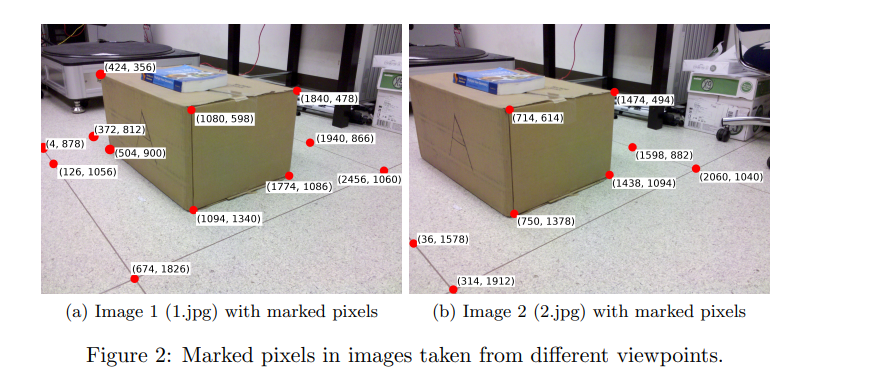

In [130]:
#vanishing points from image 1

vanishing_point_IMA1 = compute_vanishing_point([[1080, 598], [1840, 478], [1094, 1340], [1774, 1086]])  
vanishing_point_IMA2 = compute_vanishing_point([[1094, 1340], [1774, 1086], [674, 1826], [2456, 1060]])  
vanishing_point_IMA3 = compute_vanishing_point([[126, 1056], [674, 1826], [1940, 866], [2456, 1060]])  
vanishing_point_IMA4 = compute_vanishing_point([[1080, 598], [1094, 1340], [1840, 478], [1774, 1086]])   

print(vanishing_point_IMA1)
print(vanishing_point_IMA2)
print(vanishing_point_IMA3)
print(vanishing_point_IMA4)

[4545.25628141   50.85427136]
[6517.22217664 -685.73298951]
[-721.31652738 -134.57249285]
[1190.60886508 6460.269849  ]


In [131]:
#vanishing points from image 2

vanishing_point_IMB1 = compute_vanishing_point([[714, 614], [1474, 494], [750, 1378], [1438, 1094]])  
vanishing_point_IMB2 = compute_vanishing_point([[750, 1378], [1438, 1094], [314, 1912], [2060, 1040]])  
vanishing_point_IMB3 = compute_vanishing_point([[36, 1578], [314, 1912], [1598, 882], [2060, 1040]])  
vanishing_point_IMB4 = compute_vanishing_point([[714, 614], [750, 1378], [1474, 494], [1438, 1094]])   

print(vanishing_point_IMB1)
print(vanishing_point_IMB2)
print(vanishing_point_IMB3)
print(vanishing_point_IMB4)

[3769.60144058  131.53661465]
[4400.30302099 -128.81113076]
[-1395.37360487  -141.70785621]
[1045.14369501 7641.60508309]
